target==tag==class==annotation==y

In [6]:
import tensorflow as tf
from tensorflow import keras
import keras.backend as K

# Import stuff fof preprocessing
from keras.preprocessing.image import ImageDataGenerator

# Import stuff for model generation
from keras.models import Sequential
from keras.layers import Activation 
from keras.layers.core import Dense, Flatten
from keras.layers import BatchNormalization
from keras.layers.convolutional import *
from keras.optimizers import Adam

#Improt stuff for model performance analysys
from keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix

#Import other tools
import numpy as np # nice library to work with data arrays and matrices 
import itertools # loop optimizing tool. It creates itterators
import matplotlib.pyplot as plt # library for plotting graphs
# tell the plot to not open a seperate windows for each plot. # The % commands are called magic commands.
%matplotlib inline 
from PIL import Image # used for loading images
import os # used for navigating to image path. Os is generally for operating in the operation system (does not matter which one)


Using TensorFlow backend.


In [8]:
root_directory='C:/Users/werth/Documents/GitHub/Workshop/Bilder/small_structured/' 
Test_image='C:/Users/werth/Documents/GitHub/Workshop/Bilder/Testcompare/' # singel images to show example
Test_pfad='input/Test/'   
Train_pfad='input/Train/'
Valid_pfad='input/valid/'

 ## Defining the **data preprocessing with ImageDataGenerator** 
 We define the **ImageDataGenerator**, which later generates batches of augmented and standardized data as declared below.
 
 ***


We try to explain the main features below in our own words, but you can also check the [official guide](https://keras.io/preprocessing/image/) as there are more features than here explained.

 Generally, the input data should be standardized. If you load all data at once, this has to be done separate. With the Data generator, this can happen on the fly within the data generator.
 
 - **rescale**
 
   In many tutorials you will find the point to rescale your images from 0-255 to 0 and 1 to merge the color resemblence of 255 differnet RGB combinations into a thight cheme between 0 and 1. The ImageDataGenerator can do that with the parameter `rescale=1./255.` or any other number. Rescale is applied after all the other augmentations.
   


 
 - **featurewise_center, samplewise_center**
 
   This parameters sets mean to zero. Together with the next parameter, those are the standard normalization steps which should be set to TRUE. Both reduce the optimization instability. Where 'samplewise' uses normalization within each image/data separate. Feature wise does this over the whole batch and is same as the known Batchnormalization. 
   the difference is important to notice. Normally, each feature (e.g., temperature and body hight) are very different in their data range. Therefore we would like to normalize per feature, that the range for each feature does not intermix with other features.   
   
- **featurewise_std_normalization, samplewise_std_normalization**   

   This parameters sets the standard derivation to 1. See also above

 
- **zca_whitening**

    A whitening transform of an image is a linear algebra operation that reduces the redundancy in the matrix of pixel images.

  Less redundancy in the image is intended to better highlight the structures and features in the image to the learning algorithm.

  Typically, image whitening is performed using the Principal Component Analysis (PCA) technique. More recently, an alternative called sparce component analysis (ZCA) shows better results and results in transformed images that keeps all of the original dimensions and unlike PCA, resulting transformed images still look like their originals.
  

- **width_shift_range=0.0, height_shift_range=0.0**

  As later real input data might not be always in the center of the image, you can apply random shift which randomly shifts images away from the center. 

The same principle holds for the following options:
- **rotation_range**
- **brightness_range**
- **shear_range**
- **zoom_range**

All the above do not create new images but augment existing ones. You can save the augmented images to enlarge your dataset.  This does not include using different background images. The saving can be done with the flow, flow_from_dataframe, or flow_from_directory command. We will get to this commands in a second.

- **color_mode**
   
   It can be easier for a CNN to determine edges and recognize objects if the image is turned into a greyscale image. Therefore, it can be tried to use `color_mode='greyscale'` within flow, flow_from_dataframe, or flow_from_directory function. More of those functions later.
   

- **preprocessing_function**

  If you want to use your own preprocessing function you can point to it with `preprocessing_function= yourfunction`  The function will run after the image is resized and augmented. The function should take one argument: one image (Numpy tensor with rank 3), and should output a Numpy tensor with the same shape.
  
  
- **validation_split**

   Important. The data you use have to be separated into train test sets for the model be able to update its weights without bias. You can either do that beforehand by sorting your data in train and test folders. But then the split is fixed. With this parameter you can split the data on the fly which is very handy if the data is all in one folder or loaded via a CSV file. the split is in percent so use a value between 0.0 and 1. 
  

In [9]:
datagen =ImageDataGenerator(featurewise_center=True, 
                            samplewise_center=False, 
                            featurewise_std_normalization=True, 
                            samplewise_std_normalization=False, 
                            zca_whitening=False, 
                            zca_epsilon=1e-06,
                            rotation_range=0, 
                            width_shift_range=0.0, 
                            height_shift_range=0.0, 
                            brightness_range=None, 
                            shear_range=0.0, 
                            zoom_range=0.0, 
                            channel_shift_range=0.0, 
                            fill_mode='nearest', 
                            cval=0.0, 
                            horizontal_flip=False, 
                            vertical_flip=False, 
                            rescale=1./255., 
                            preprocessing_function=None, 
                            data_format='channels_last', 
                            validation_split=0.0)

## Example

Now lets try some image augmentations. Load a test image and use the ImageDataGenerator
If you do not change the parameter data_format, the input should be of format:  `(samples, height, width, channels)`



<div class="alert alert-block alert-info">
<b>Also important:</b>

 If you use flow_from_directory it is looking for at least one subdirectory in the root folder

</div>

Found 1 images belonging to 2 classes.


C:\Users\werth\AppData\Local\Continuum\anaconda3\envs\AI_GPU\lib\site-packages\keras_preprocessing\image.py:988: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\werth\AppData\Local\Continuum\anaconda3\envs\AI_GPU\lib\site-packages\keras_preprocessing\image.py:996: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


(1, 170, 255, 3)

(1, 170, 255, 3)

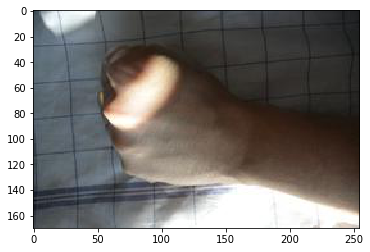

(170, 255, 3)

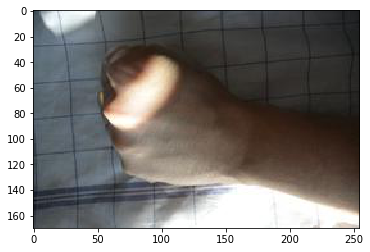

(170, 255, 3)

In [10]:
batches =datagen.flow_from_directory(directory=Test_image, classes=['Faust', 'Offen'],
                                     target_size=[170,255],
                                     class_mode='categorical',
                                     batch_size=1,
                                     color_mode='rgb')


img_batch = next(batches)

display(img_batch[0].shape) # show the image shape

for i in range (0,1):
    image = img_batch[i]#.transpose((2,1,3,0))
    display(image.shape)
    image=np.squeeze(image)
    plt.imshow(image)
    plt.show()
    display(image.shape)
   # image=np.squeeze(image, axis=3) #    image=np.squeeze(image, axis=3)
   # display(image.shape)
  #  plt.imshow(image,norm=NoNorm())
  #  plt.show()


# Load the image again to plot the original

im = Image.open(Test_image + 'Faust/Faust (1).JPG')
#display(im)
#display(im.size)

pix = np.array(im)
plt.imshow(pix)
plt.show()
display(pix.shape)

## Defining train and validation batches with flow functions

After comparing the images, now create generator for train and validation data which is later needed to fit into the model.
***

**Let's quickly check what the `flow` functions do:**

Generally, the flow functions generate data on the fly. 

- **flow**

  if you have a small number of data which fits into your memory, then you can load all data at once and fit it into an numpy or pandas array. flow then calls an amount of data from that array to feed it to the model.


- **flow_from_directory**

  this function reads the data from a directory. The directory expects at least one subfolder. The target are automatically named after the subfolders if not otherwise determined with `classes=['target1','target2']` 


- **flow_from_dataframe**

  This loads the data from a pandas dataframe (pandas is based on numpy). The datafram can be a transformed CSV file (quite common type). Within the CSV file the path has to be given to the file and the target. 
  
  ***
  
### Parameters of the flow functions

please also check the guides for [flow](https://keras.io/preprocessing/image/#flow), [flow_from_directory](https://keras.io/preprocessing/image/#flow_from_directory), and [flow_from_dataframe](https://keras.io/preprocessing/image/#flow_from_dataframe)  as we will discuss only the main parameters here
  
  
- **batch_size** Integer(default: 32)

  the batch size determines how many images are loaded at the same time. A batch size of 1 is called a minibatch. If you choose a minibatch, the gradient descent will be very fast as it is updated after every (very small) batch, but will mostly likely be more erratic as the direction of the gradient descent is based on only one example. If you choose the maximum size for the batch_size, which is the numbers of samples you have at hand (or fit into your memory), the gradient descent will be much slower but less erratic. Choosing something in between is suggested. 
  We choose batch_size of 30 as we have a total of 180 training images at this point. If the batch_size does not fit into the amount of images ,images might be left out. For general data, this is not a problem as the last batch will just be smaller with padded values. To my knowledge that is not possible for images. I heard that it would be best to have the batch size as a multiple of 32 or 2^n.  This is connected to the RAM-BUS operations which are based on 2^n. Using different sizes will reduce the efficiency of the system. 

- **class_mode**

  This is important depending on what is planned. If we have a binary problem use either `'binary'` or `'categorical'`. Categorical creates a [one-hot-encoded](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) target which is optimal to be handled by the model. `'input'` is used for generative adversarial Networks (GAN).
   If none is given, non is created. This can be used e.g. later for running inference without target information.
   
   
  
- **shuffle** Boolean (default: True).

  to shuffle or not to shuffle. To increase generalization i would always choose shuffle true. Again, for time-series data using LSTMs this might not be advisable.
 
  
  
- **sample_weight** 

  If the data is heavily unbalanced, the unbalance can be tackled with sample eights. Increase the sample weights for the samples from the minority class. There are also other tricks to fight imbalance. but this is not the right place to talk about it.
  
  
- **seed** Int (default: None)

  If you shuffle randomly but want to be able to recreate the shuffle use a number. Always use 42 for the obvious reason. 
  
  
- **save_to_dir**

   If you generate a lot of images they can be used to enlarge the dataset for later reuse. Or jsut to check on what data the model actually trained
   
   
- **subset:**

  If you do not have a Train, validate structure from which you load the data, e.g., a CSV file with all files at once, you were able to determine the split earlier in the `ImageDataGenerator`. Now you can tell the flow what it is, a `'taining'` or `'validation'` batch generator. 




In [11]:
train_batch_generator=ImageDataGenerator().flow_from_directory(root_directory + Train_pfad, target_size=(170,255), class_mode='categorical', batch_size=30, shuffle=True, seed=42)
test_batch_generator =ImageDataGenerator().flow_from_directory(root_directory + Train_pfad, target_size=(170,255), class_mode='categorical', batch_size=30, shuffle=True, seed=42)

Found 180 images belonging to 2 classes.
Found 180 images belonging to 2 classes.


## defining the model before we fit the data to the model

Now it is time to talk about the model. Please check the jupyter file [Simple_CNN_model](http://localhost:8888/notebooks/Jupyter%20Notebook/Simple_CNN_model.ipynb) for explantions on the model structure and layers.


In [12]:
%run Simple_CNN_model.ipynb

model=Einfaches_CNN_Model(input_shape=,num_category=2)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

SyntaxError: invalid syntax (<ipython-input-12-1148b4ea41d6>, line 3)

## fit_generator

the fit_generator function takes the previously defined model and fit the data to the model. The data is defined in the earlier `ImageDataGenerator` and generated via the `flow` functions. 

The guide can be found [here](https://keras.io/models/sequential/#fit_generator)


`fit_generator(generator, steps_per_epoch=None, epochs=1, verbose=1, callbacks=None, validation_data=None, validation_steps=None, validation_freq=1, class_weight=None, max_queue_size=10, workers=1, use_multiprocessing=False, shuffle=True, initial_epoch=0)`


## Main parameters of fit_generator


- **generator**

  Here we define which of the earlier defined generators is used to create the training data. 


- **steps_per_epoch** <font size="1"> credit to [Silpion](https://datascience.stackexchange.com/users/49704/silpion) </font> 
   
   the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined.

  The number of batch iterations before a training epoch is considered finished. If you have a training set of fixed size you can ignore it but it may be useful if you have a huge data set or if you are generating random data augmentations on the fly, i.e., if your training set has a (generated) infinite size. If you have the time to go through your whole training data set I recommend to skip this parameter.
  
  This parameter is most important when infinitive data is generated. Then the step size should be limited.
  

- **validation_steps**

  similar to steps_per_epoch but on the validation data set instead on the training data. If you have the time to go through your whole validation data set I recommend to skip this parameter.
  
- **verbose**

  you can set it to 1 or 2 if you want to see the training, otherwise 0
  
- **callbacks**

  You can create own callback functions, or use [predefined ones ](https://keras.io/callbacks/)




In [13]:

#STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
#STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
model.fit_generator(generator=train_batch_generator,
                    #steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    #validation_steps=STEP_SIZE_VALID,
                    epochs=10)

NameError: name 'model' is not defined

In [ ]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()